In [1]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("Final.csv")
dataset.head()


,Unnamed: 0,mean_H,mean_S,mean_V,stddev_H,stddev_S,stddev_V,entropy_H,entropy_S,entropy_V,Skew_H,Skew_S,Skew_V,Kurtosis_H,Kurtosis_S,Kurtosis_V,label,Color Code,Ripeness Code,Uniformity Code
0,IMG_20170609_121501.jpg,103.625344,150.115251,185.511408,2.719907,31.792205,36.967909,2.425289,4.874979,4.936882,-10.757538,0.999510,-1.349998,490.188907,1.812756,3.140637,NaN,3,R,W
1,IMG_20170609_121539.jpg,103.761329,150.645503,178.679519,3.103255,30.959667,37.815029,2.555942,4.849467,4.979512,-12.659618,0.943212,-1.279067,525.264241,1.810682,2.883282,NaN,3,R,W
2,IMG_20170609_121556.jpg,103.355815,148.943916,186.734285,2.117603,29.802781,33.560293,2.178525,4.812019,4.862720,-3.603895,0.981365,-1.246027,311.185592,1.952969,3.156205,NaN,3,R,W
3,IMG_20170609_121604.jpg,103.389273,149.850456,183.145827,3.249377,31.697308,36.858431,2.601241,4.871880,4.944156,-16.587754,0.856413,-1.294449,561.072469,1.733411,3.104665,NaN,3,R,W
4,IMG_20170609_121626.jpg,103.641312,145.893100,186.715184,2.081984,30.483949,35.004858,2.161499,4.835071,4.893274,-1.779351,1.032159,-1.119625,254.469867,1.896333,2.426695,NaN,3,R,W


In [3]:
Y = dataset.iloc[: , 19]
X = dataset.iloc[:, [4,6,10,12,13]]

#x_train , y_train , x_test , y_test = train_test_split(X , Y , test_size = 0.33 ,random_state = 42 )

In [4]:
label = LabelEncoder()
enc_unif = label.fit_transform(Y)
x_train , x_test , y_train , y_test = train_test_split(X , enc_unif , test_size = 0.33 ,random_state = 42 )


In [5]:
unif_class = xgb.XGBClassifier(eta = 0.1 , random_state = 42 , n_estiamtors = 200 , 
                              objective = 'multi:softmax' , num_classes = 3 , booster = 'gbtree')
unif_class.fit(x_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estiamtors=200, n_estimators=100, n_jobs=1, nthread=None,
       num_classes=3, objective='multi:softprob', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

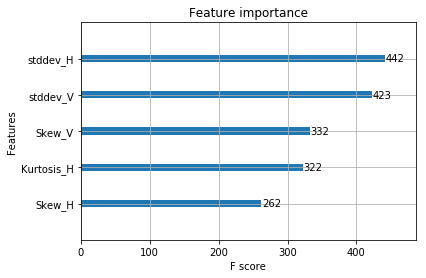

In [6]:
xgb.plot_importance(unif_class)

In [7]:
y_pred = unif_class.predict(x_test)


C:\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [8]:
accuracy  = accuracy_score(y_test , y_pred) * 100
print("ACCURACY OF UNIFORMITY : {}".format(accuracy))

ACCURACY OF UNIFORMITY : 73.95348837209302


In [9]:
print(label.inverse_transform(y_pred))

['M' 'K' 'K' 'M' 'W' 'W' 'K' 'K' 'K' 'K' 'K' 'M' 'M' 'K' 'K' 'W' 'W' 'M'
 'W' 'M' 'M' 'K' 'M' 'M' 'M' 'M' 'K' 'W' 'M' 'K' 'K' 'M' 'K' 'K' 'M' 'K'
 'K' 'W' 'K' 'K' 'K' 'W' 'M' 'M' 'M' 'W' 'M' 'M' 'K' 'M' 'M' 'K' 'M' 'M'
 'K' 'K' 'K' 'K' 'W' 'K' 'K' 'K' 'M' 'M' 'M' 'W' 'M' 'M' 'K' 'K' 'W' 'M'
 'K' 'M' 'K' 'K' 'K' 'K' 'W' 'M' 'M' 'M' 'M' 'M' 'M' 'K' 'W' 'K' 'K' 'M'
 'K' 'K' 'W' 'M' 'W' 'W' 'M' 'K' 'M' 'K' 'K' 'K' 'W' 'K' 'K' 'K' 'W' 'M'
 'M' 'K' 'M' 'M' 'K' 'M' 'M' 'K' 'K' 'M' 'M' 'K' 'K' 'M' 'M' 'K' 'M' 'K'
 'M' 'M' 'K' 'M' 'K' 'K' 'K' 'K' 'K' 'K' 'M' 'M' 'K' 'M' 'K' 'K' 'K' 'M'
 'M' 'M' 'M' 'M' 'W' 'M' 'K' 'K' 'K' 'K' 'K' 'K' 'M' 'M' 'K' 'M' 'K' 'K'
 'K' 'K' 'M' 'W' 'K' 'M' 'M' 'K' 'K' 'W' 'M' 'K' 'M' 'M' 'W' 'K' 'M' 'M'
 'K' 'W' 'M' 'M' 'W' 'K' 'K' 'M' 'M' 'W' 'M' 'M' 'K' 'K' 'K' 'K' 'M' 'K'
 'M' 'K' 'K' 'M' 'M' 'K' 'M' 'M' 'K' 'K' 'K' 'M' 'K' 'M' 'K' 'W' 'K']


C:\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
